# L-systems


## Turtle geometry

### Creation of a polygon

Complete the axiom that will generate the following polygonal shape. Use the command F, + et -. By default, non indicated angles are equal to 90° and length to 1.

```python
Axiom: ,(2) _(0.02) { . F    ....  } (True)
```

![mappleleaf](./img/mappleleaf.png)



## Branch shape

 - Load the [recursive tree structure](./recursivetree.lpy)

 - Insert an helio-tropism into the axiom. Test different values of the elasticity. Use command `@Tp` and `@Ts`

 - Remove tropism and insert a guide at the beginning of each branch. Edit graphically the guide to achieve curved architecture. Use `SetGuide`.


## Fractals

Reproduce the following rule and generate the resulting fractal shape until iteration 3.

![peanocurve](./img/peanocurve.png)

```python
Axiom: -(90) F
derivation length: 3
production:
F --> ...
```

Reproduce the following rule and generate the resulting fractal shap euntil iteration 3.

![cantordust](./img/cantordust.png)


## Signals

Complete the [model signal.lpy](./signal.lpy) to simulate the propagation of a signal



## Environment

Test the root model : [grid-rootinsoil2.lpy](./env/grid-rootinsoil2.lpy) with [grid.py](./env/grid.py)

Test the light model : [light-growth.lpy](./env/light-growth.lpy) with [light.py](./env/sunDome.py) and [sunDome.py](./env/light.py)

## Phylotaxie

Reproduire ces organisations

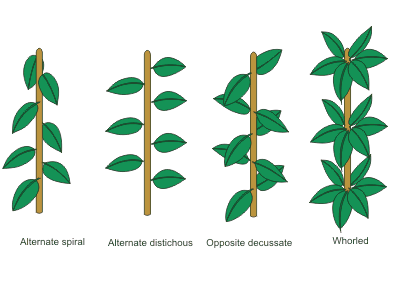

## Arborescence

A partir d'une structure binaire et planaire [binarytree.lpy ](./binarytree.lpy ), générer une structure 3D avec un nombre aléatoire de ramifications compris entre 2 et 4.

Ajouter de l'heliotropisme.

## Space Colonization

Tester la generation d'un nuage de point avec [pointinprofile.lpy](./pointinprofile.lpy)

Completer l'algorithme de colonization de l'espace [spacecolonization-canevas.lpy](./spacecolonization-canevas.lpy)